Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Bioinformatika 1

### 1. Čitanje podataka

In [2]:
import os
from Bio import SeqIO
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from pandas import DataFrame
from sklearn.cluster import KMeans

In [36]:
notebook_path = os.path.abspath("genomeClustering.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "data/J29B_expected.fasta")
pathFASTQ= os.path.join(os.path.dirname(notebook_path), "data/J29_B_CE_IonXpress_005.fastq")


expected = list(SeqIO.parse(path, "fasta"))

data = list(SeqIO.parse(pathFASTQ, "fastq"))





In [37]:
from Bio import Align

global_aligner = Align.PairwiseAligner()
global_aligner.mode = 'global'
global_aligner.match_score = 1
global_aligner.open_gap_score = -1
global_aligner.extend_gap_score = -1
global_aligner.target_end_gap_score = 0
global_aligner.query_end_gap_score = -0.5

    

In [67]:
sub='GATCCTCTCTCTGCAGCACATTTCCTG'
pre='CAGCGGCGAGGTGACGCGAA'

scores=[]
result=[]
for sequence in data:
    replaced = str(sequence.seq).replace(sub,'').replace(pre,'')
    if(len(replaced)==249):
        alignments0 = global_aligner.align(expected[0].seq,replaced)  
        alignments1 = global_aligner.align(expected[1].seq,replaced)  
        alignments2 = global_aligner.align(expected[2].seq,replaced)  
        if((alignments0[0].score>240)or(alignments1[0].score>240)or(alignments2[0].score>240) ):
        
        
            result.append(replaced)
            scores.append([alignments0[0].score,alignments1[0].score,alignments2[0].score])




In [68]:
print(scores)

[[232.0, 248.0, 222.0], [226.0, 241.0, 216.0], [249.0, 233.0, 219.0], [248.0, 232.0, 218.0], [233.0, 249.0, 223.0], [228.0, 244.0, 218.0], [243.0, 227.0, 213.0], [249.0, 233.0, 219.0], [249.0, 233.0, 219.0], [246.0, 230.0, 216.0], [249.0, 233.0, 219.0], [233.0, 249.0, 223.0], [249.0, 233.0, 219.0], [249.0, 233.0, 219.0], [249.0, 233.0, 219.0], [233.0, 249.0, 223.0], [249.0, 233.0, 219.0], [249.0, 233.0, 219.0], [248.0, 232.0, 218.0], [249.0, 233.0, 219.0], [248.0, 232.0, 218.0], [248.0, 232.0, 218.0], [249.0, 233.0, 219.0], [233.0, 249.0, 223.0], [233.0, 249.0, 223.0], [248.0, 234.0, 218.0], [249.0, 233.0, 219.0], [249.0, 233.0, 219.0], [248.0, 232.0, 218.0], [233.0, 249.0, 223.0], [249.0, 233.0, 219.0], [249.0, 233.0, 219.0], [249.0, 233.0, 219.0], [249.0, 233.0, 219.0], [249.0, 233.0, 219.0], [248.0, 232.0, 218.0], [248.0, 232.0, 218.0], [249.0, 233.0, 219.0], [249.0, 233.0, 219.0], [249.0, 233.0, 219.0], [230.0, 246.0, 220.0], [249.0, 233.0, 219.0], [249.0, 233.0, 219.0], [249.0, 23

In [69]:
from sklearn.preprocessing import StandardScaler
scores_standard = StandardScaler().fit_transform(scores)
print(scores_standard)

#STANDARDIZACIJA SCOREA

[[-3.57935607  4.75316053  1.60917559]
 [-4.95866348  2.49693053 -1.45078829]
 [ 0.32868161 -0.08161804  0.07919365]
 ...
 [ 0.09879704 -0.40393661 -0.43080033]
 [ 0.32868161 -0.08161804  0.07919365]
 [ 0.32868161 -0.08161804  0.07919365]]


In [70]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scores_standard)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
print(principalDf)
print(principalDf.PC1.values)
print(principalDf.PC2.values)

#PREBACUJEM U DVIJE DIM

          PC1       PC2
0    5.882722 -1.676719
1    4.210646 -2.749444
2   -0.239506  0.117675
3   -0.487986 -0.093845
4    6.131202 -1.465198
..        ...       ...
771 -0.239506  0.117675
772  0.632853 -0.119116
773 -0.487986 -0.093845
774 -0.239506  0.117675
775 -0.239506  0.117675

[776 rows x 2 columns]
[ 5.88272218  4.21064583 -0.23950637 -0.48798584  6.13120165  4.8888043
 -1.73038319 -0.23950637 -0.23950637 -0.98494478 -0.23950637  6.13120165
 -0.23950637 -0.23950637 -0.23950637  6.13120165 -0.23950637 -0.23950637
 -0.48798584 -0.23950637 -0.48798584 -0.48798584 -0.23950637  6.13120165
  6.13120165 -0.12558678 -0.23950637 -0.23950637 -0.48798584  6.13120165
 -0.23950637 -0.23950637 -0.23950637 -0.23950637 -0.23950637 -0.48798584
 -0.48798584 -0.23950637 -0.23950637 -0.23950637  5.38576324 -0.23950637
 -0.23950637 -0.23950637 -0.23950637 -0.23950637 -0.48798584 -0.48798584
 -0.23950637  5.38576324  6.13120165 -0.23950637  9.32560422 -0.23950637
 -0.48798584 -0.23950637 -0.4879

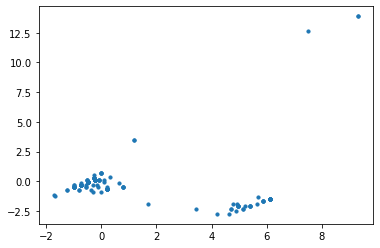

In [71]:
plt.scatter(principalDf.PC1.values, principalDf.PC2.values,  cmap=plt.get_cmap("cool"), s=10)

C:\Users\Ana\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


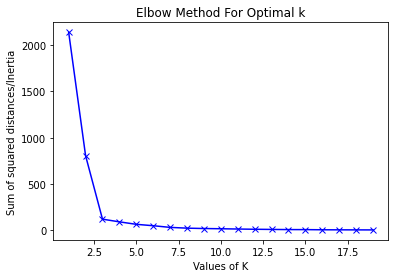

In [72]:
K = range(1,20)
Sum_of_squared_distance = []
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(principalDf)
 Sum_of_squared_distance.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distance,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

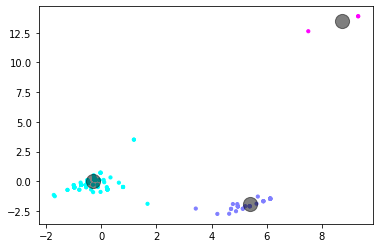

In [73]:
K=3
kmeans = KMeans(K).fit(principalDf)
predictions = kmeans.predict(principalDf)
plt.scatter(principalDf.PC1.values, principalDf.PC2.values, c=predictions, s=10, cmap='cool')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


# K MEANS SA K=3

In [74]:
print(centers)

[[-0.29910243  0.03882385]
 [ 5.39646656 -1.91734101]
 [ 8.72189876 13.47036618]]


In [75]:
cluster1=[]
cluster2=[]
cluster3=[]
for i in range (len(principalComponents)): 
    if(abs((principalComponents[i][0])-centers[0][0])<0.055):
        cluster1.append((i,scores[i]))
    if(abs((principalComponents[i][0])-centers[1][0])<0.1):
        cluster2.append((i,scores[i]))
    if(abs((principalComponents[i][0])-centers[2][0])<1):
        cluster3.append((i,scores[i]))
        
print(cluster1)
print()
print(cluster2)
print()
print(cluster3)
print()

[(184, [248.0, 232.0, 219.0]), (213, [248.0, 232.0, 219.0]), (231, [248.0, 232.0, 219.0]), (249, [244.0, 232.0, 216.0]), (260, [248.0, 232.0, 219.0]), (324, [248.0, 233.0, 218.0]), (454, [248.0, 232.0, 219.0]), (550, [248.0, 232.0, 219.0]), (561, [247.0, 231.0, 219.0]), (763, [248.0, 232.0, 219.0])]

[(40, [230.0, 246.0, 220.0]), (49, [230.0, 246.0, 220.0]), (632, [230.0, 246.0, 220.0]), (708, [230.0, 246.0, 220.0])]

[(52, [218.0, 222.0, 248.0]), (452, [218.0, 222.0, 248.0])]



In [76]:
clusters=[cluster1,cluster2,cluster3]
for k in range(K):
    matrix=[]
    for i in clusters[k]:
        row=[]
        for j in clusters[k]:
            alignments = global_aligner.align(result[i[0]],result[j[0]])
            shorter=min(len(result[i[0]]),len(result[j[0]]))
            row.append(shorter-alignments[0].score)
        matrix.append(row)
    matrix=np.array(matrix)        
    print(matrix)
    print("Matrix mean=", np.mean(matrix))

[[0. 2. 2. 6. 2. 2. 2. 2. 3. 2.]
 [2. 0. 0. 4. 2. 2. 2. 2. 3. 2.]
 [2. 0. 0. 4. 2. 2. 2. 2. 3. 2.]
 [6. 4. 4. 0. 6. 6. 6. 6. 7. 6.]
 [2. 2. 2. 6. 0. 2. 2. 2. 2. 1.]
 [2. 2. 2. 6. 2. 0. 2. 2. 3. 2.]
 [2. 2. 2. 6. 2. 2. 0. 2. 3. 2.]
 [2. 2. 2. 6. 2. 2. 2. 0. 3. 2.]
 [3. 3. 3. 7. 2. 3. 3. 3. 0. 1.]
 [2. 2. 2. 6. 1. 2. 2. 2. 1. 0.]]
Matrix mean= 2.5
[[0. 6. 4. 4.]
 [6. 0. 6. 6.]
 [5. 6. 0. 5.]
 [4. 6. 5. 0.]]
Matrix mean= 3.9375
[[0. 2.]
 [2. 0.]]
Matrix mean= 1.0


In [77]:
for k in range(K):
    for i in clusters[k]:
        print(result[i[0]])
        print()
    print("*******************************************************************************************************")

CTGTATGCTAAGAGCGAGTGTCATTTCTCCAACGGGACGCAGCGGGTGGGGTTCCTGGACAGATACCTCTATAACGGAGAAGAGTTCGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGCGGCCGGTGGCCGAGTACCTGAACAGCCAGAAGGAGTACATGGAGCAGACGCGGGCCGAGGTGGACACGTACTGCAGACACAACTACGGCGGCGTTGAGAGTTTCACTGTG

CTGTATGCTAAGAGCGAGTGTCATTTCTCCAACGGGACGCAGCGGGTGGGGTTCCTGGACAGATACTTCTATAACGGAGAAGAGTTCGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGCGGCCGGTGGCCGAGTACCTGAACAGCCAGAAGGAGTACGTGGAGCAGACGCGGGCCGAGGTGGACACGTACTGCAGACACAACTACGGCGGCGTTGAGAGTTTCACTGTG

CTGTATGCTAAGAGCGAGTGTCATTTCTCCAACGGGACGCAGCGGGTGGGGTTCCTGGACAGATACTTCTATAACGGAGAAGAGTTCGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGCGGCCGGTGGCCGAGTACCTGAACAGCCAGAAGGAGTACGTGGAGCAGACGCGGGCCGAGGTGGACACGTACTGCAGACACAACTACGGCGGCGTTGAGAGTTTCACTGTG

CTGTATACTACGAGCGAGTGTCATTTCTCCAACGGGACGCAGCGGGTGGGGTTCCTGGACAGATACTTCTGTAACGGAGAAGAGTTCGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGCGGCCGGTGGCCGAGTACCTGAACAGCCAGAAGGAGTACGTGGAGCAGACGCGGGCCGAGGTGGACACGTACTGCAGACACAACTACGGCGGCGTTGAGAGTTTCATTG